<a href="https://colab.research.google.com/github/mbraulio/Clasificacion-Inteligente-de-Datos-CID-2025B/blob/main/Hands-On%202%3A%20kNN%20Tutorial/HO2_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Hands-On 2: kNN Notebook**
**1.1 Fundamentos de la técnica**

El algoritmo k-Nearest Neighbors (kNN) es un método de aprendizaje supervisado usado tanto para clasificación como para regresión.
Se basa en la similitud entre ejemplos: para predecir la clase o valor de un nuevo dato, busca los k ejemplos más cercanos (vecinos) en el conjunto de entrenamiento y toma una decisión basada en ellos.

El principio fundamental del kNN es:

“Los objetos similares tienden a tener etiquetas similares.”

**Ventajas:**

- Simple de entender e implementar.

- No requiere entrenamiento explícito (modelo perezoso).

- Funciona bien con fronteras de decisión no lineales.

**Desventajas:**

- Computacionalmente costoso en grandes conjuntos de datos.

- Sensible a la escala de las características.

- Depende de la elección de k y de la métrica de distancia.

**1.2 Modelo Matemático del kNN**

Dado un punto nuevo $x_q$ que queremos clasificar:

1. Calculamos la distancia entre $x_q$ y todos los puntos de entrenamiento $x_i$:

$$
d(x_q, x_i) = \sqrt{(x_{q1} - x_{i1})^2 + (x_{q2} - x_{i2})^2 + \cdots + (x_{qn} - x_{in})^2}
$$


2. Seleccionamos los k puntos más cercanos según esa distancia.

3. En clasificación:

    - Se toma la clase mayoritaria entre los vecinos.

    En regresión:

    - Se calcula el promedio de los valores de los vecinos.

**1.3 Descripción de la librería, clases y funciones empleadas**

**sklearn.neighbors import KNeighborsClassifier**

Clase de Scikit-learn que implementa el algoritmo kNN para clasificación.
Principales parámetros:

- n_neighbors: número de vecinos a considerar (k).

- metric: tipo de distancia (por defecto ‘minkowski’ → Euclidiana).

- weights: pondera los vecinos (‘uniform’ o ‘distance’).

**sklearn.metrics import accuracy_score**

Evalúa el porcentaje de aciertos comparando las etiquetas verdaderas con las predichas.

**Numpy as np**

Librería para manipular arreglos y realizar cálculos numéricos.

**import pandas as pd**

Librería esencial para el manejo y análisis de datos tabulares.
Proporciona estructuras como DataFrame y Series, útiles para calcular estadísticas (media, desviación estándar, máximo, mínimo, etc.) y preparar los datos antes del modelado.

**import matplotlib.pyplot as plt**

Librería de visualización gráfica.
Permite generar gráficos de barras, líneas y dispersión (scatter plot).
En este notebook se utiliza para representar visualmente la distribución de los puntos del dataset y observar la separación entre clases.

**import seaborn as sns**

Biblioteca basada en Matplotlib que simplifica la creación de gráficos estadísticos atractivos y más informativos.
Proporciona funciones de alto nivel como:

sns.heatmap() : para visualizar matrices (por ejemplo, la matriz de confusión).

sns.pairplot() : para explorar relaciones entre variables.

sns.boxplot() : para observar la dispersión y presencia de valores atípicos.

Se integra fácilmente con pandas y ofrece paletas de colores temáticas y estilos más estéticos que mejoran la presentación de los resultados experimentales.

**Preprocesamiento (... líneas de código fuente para hacer un previo análisis estadístico  (avg, desv std, max, min..) del dataset así como el despliegue del Gráfico de Dispersión (Scatter Chart/Plot))**

Antes de entrenar el modelo, realizamos un análisis estadístico de las características y un gráfico de dispersión para visualizar su distribución.


```python
# Análisis estadístico
print("=== Estadísticas descriptivas ===")
print(df.describe())

promedios = df[['x1','x2']].mean()
desviaciones = df[['x1','x2']].std()
maximos = df[['x1','x2']].max()
minimos = df[['x1','x2']].min()

print("\nPromedios:\n", promedios)
print("\nDesviaciones estándar:\n", desviaciones)
print("\nMáximos:\n", maximos)
print("\nMínimos:\n", minimos)

# Gráfico de dispersión
plt.figure(figsize=(5,5))
plt.scatter(df['x1'], df['x2'], c=df['Clase'], cmap='coolwarm', s=100, edgecolor='k')
plt.title('Gráfico de Dispersión (Dataset XOR)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()
```
**Feature Engineering**

Antes de seleccionar variables, define claramente qué deseas predecir (la variable dependiente o variable objetivo).

Por ejemplo:

Si quieres predecir el precio de una casa, la variable dependiente podría ser Precio.

Si quieres estimar el consumo eléctrico, la variable dependiente podría ser Consumo_kWh.

Todas las demás variables candidatas serán tus variables independientes (predictoras).

Antes de elegir las variables, realiza un análisis exploratorio:
```python
import pandas as pd
df.describe()
df.info()
df.corr()  # matriz de correlación
```
Esto te permitirá:

- Detectar valores nulos o outliers.

- Conocer la distribución y rango de cada variable.

- Identificar qué variables correlacionan más con la variable objetivo.

Las variables más correlacionadas con la variable dependiente suelen ser buenos candidatos para un modelo de regresión. Los modelos de regresión (como la Regresión Lineal) requieren variables numéricas o categóricas que puedan convertirse a números.

Para seleccionar las variables más útiles:

Se puede usar el método df.corr() para calcular la correlación de cada variable con la variable objetivo. Se deben escoger aquellas que tengan una correlación moderada o alta (por ejemplo, $|r| > 0.3$).

```python
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()
```
Se deben evitar variables redundantes o altamente correlacionadas entre sí, Si dos variables tienen una correlación muy alta entre ellas (por ejemplo > 0.9), se dice que hay multicolinealidad, lo cual puede distorsionar los coeficientes del modelo. Por ello lo convieniente es dejar una de las dos o aplicar tecnicas de reduccion de dimensionalidad.

Una vez identificadas las variables candidatas, puedes usar métodos automáticos de selección:

- Forward Selection (selección progresiva):

Empieza con ninguna variable y vas agregando una por una, probando cuál mejora más el modelo (según métricas como $R^2$, AIC o RMSE).

- Backward Elimination (eliminación regresiva):

Empiezas con todas las variables y eliminas progresivamente las que menos aportan (según el valor p > 0.05 en pruebas estadísticas).

En este caso, definimos las variables de entrada y salida del problema XOR, que no es linealmente separable:

```python
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])  # XOR

```

**Model Selection**
El modelo kNN es adecuado porque:

- No requiere una frontera lineal.

- Clasifica en función de la similitud entre puntos.

- Se adapta bien a distribuciones complejas como XOR.

**Model Training**
```python
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(X, y)
```

**Prediction**
```python
def probar_patrones(modelo, X, y_verdad):
    print("Prueba de patrones:\n")
    todos_bien = True
    for x, t in zip(X, y_verdad):
        y_pred = modelo.predict([x])[0]
        correcto = (y_pred == t)
        if not correcto:
            todos_bien = False
        print(f"Entrada: {x} → Esperado: {t} | Predicho: {y_pred} | Correcto: {correcto}")
    if todos_bien:
        print("\n✅ Todos los patrones fueron clasificados correctamente.")
    else:
        print("\n⚠️ Hay patrones mal clasificados.")
```

**Model Evaluation:**
Calculo de Accuracy
```python
from sklearn.metrics import accuracy_score

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)

print("Salidas esperadas:", y)
print("Salidas predichas:", y_pred)
print(f"Exactitud (Accuracy): {accuracy*100:.2f}%")
```
La Exactitud representa el porcentaje de predicciones correctas respecto al total de ejemplos:

$$
\textit{Accuracy} = \frac{\text{número de predicciones correctas}}{\text{número total de ejemplos}}
$$

Un valor de 100% indica que el modelo clasificó correctamente todos los patrones del conjunto de datos.

Calculo de Matriz de confusión, la cual permite visualizar los aciertos y errores de clasificación, mostrando cuántos ejemplos de cada clase fueron correctamente o incorrectamente clasificados.
```python
# Cálculo de la matriz de confusión
cm = confusion_matrix(y, y_pred)

print("\nMatriz de Confusión:\n", cm)

# Visualización gráfica
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - kNN')
plt.show()
```
- Los valores en la diagonal principal indican las predicciones correctas.

- Los valores fuera de la diagonal representan los errores de clasificación.

- En un modelo ideal, los valores fuera de la diagonal deben ser 0.

**3. Referencias Bibliograficas**
- Scikit-learn Developers. (n.d.). KNeighborsClassifier — scikit-learn documentation.
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- GeeksforGeeks. (2023). K-Nearest Neighbors Algorithm in Machine Learning.
https://www.geeksforgeeks.org/k-nearest-neighbours/

- IBM. (2025, 7 octubre). ¿Que es algoritmo KNN?. IBM. https://www.ibm.com/mx-es/think/topics/knn

- Pandas Developers. (n.d.). pandas.DataFrame.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

=== Estadísticas descriptivas ===
            x1       x2    Clase
count  4.00000  4.00000  4.00000
mean   0.50000  0.50000  0.50000
std    0.57735  0.57735  0.57735
min    0.00000  0.00000  0.00000
25%    0.00000  0.00000  0.00000
50%    0.50000  0.50000  0.50000
75%    1.00000  1.00000  1.00000
max    1.00000  1.00000  1.00000

Promedios:
 x1    0.5
x2    0.5
dtype: float64

Desviaciones estándar:
 x1    0.57735
x2    0.57735
dtype: float64

Valores máximos:
 x1    1
x2    1
dtype: int64

Valores mínimos:
 x1    0
x2    0
dtype: int64


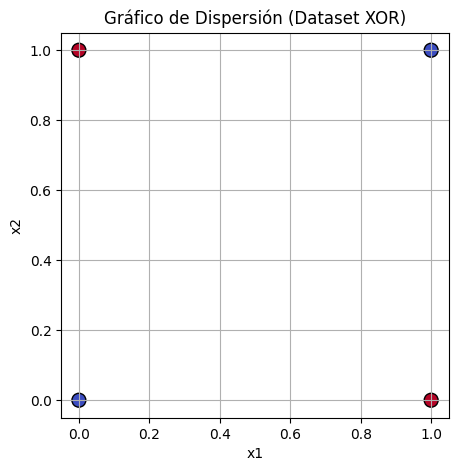


Prueba de patrones:

Entrada: [0 0]  →  Esperado: 0  |  Predicho: 0  |  Correcto: True
Entrada: [0 1]  →  Esperado: 1  |  Predicho: 1  |  Correcto: True
Entrada: [1 0]  →  Esperado: 1  |  Predicho: 1  |  Correcto: True
Entrada: [1 1]  →  Esperado: 0  |  Predicho: 0  |  Correcto: True

 Todos los patrones fueron clasificados correctamente.

Salidas esperadas: [0 1 1 0]
Salidas predichas: [0 1 1 0]
Exactitud (Accuracy): 100.00%

Matriz de Confusión (valores numéricos):
 [[2 0]
 [0 2]]


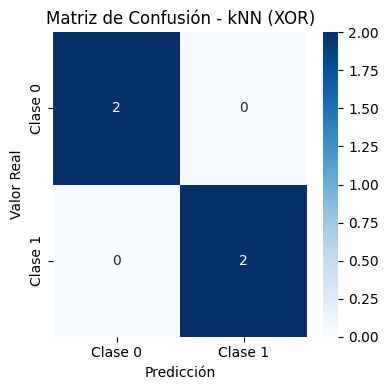

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 1.4 Pipeline
# ==============================

# --- Feature Engineering: Definición del dataset (XOR) ---

# X: variables de entrada
# y: variable de salida (clase)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([0, 1, 1, 0])   # XOR


# --- Preprocesamiento: análisis estadístico y gráfico de dispersión ---

# Crear DataFrame para analizar los datos
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['Clase'] = y

print("=== Estadísticas descriptivas ===")
print(df.describe())

# Cálculo explícito de algunas medidas
promedios = df[['x1', 'x2']].mean()
desviaciones = df[['x1', 'x2']].std()
maximos = df[['x1', 'x2']].max()
minimos = df[['x1', 'x2']].min()

print("\nPromedios:\n", promedios)
print("\nDesviaciones estándar:\n", desviaciones)
print("\nValores máximos:\n", maximos)
print("\nValores mínimos:\n", minimos)

# Gráfico de dispersión (Scatter Plot)
plt.figure(figsize=(5, 5))
plt.scatter(df['x1'], df['x2'], c=df['Clase'], cmap='coolwarm', s=100, edgecolor='k')
plt.title('Gráfico de Dispersión (Dataset XOR)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()


# --- Model Selection & Training: definición y entrenamiento del modelo kNN ---

# Definir el clasificador kNN
# n_neighbors = 3: número de vecinos a considerar
# metric = 'euclidean': distancia Euclidiana
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Entrenar el modelo con los datos XOR
model.fit(X, y)


# --- Prediction: función para probar los patrones de entrada ---

def probar_patrones(modelo, X, y_verdad):
    """
    Imprime la clasificación de cada patrón de entrada y verifica
    si el modelo acierta todas las predicciones.
    """
    print("\nPrueba de patrones:\n")
    todos_bien = True  # bandera que indica si el modelo acertó todos los casos

    for x, t in zip(X, y_verdad):
        # [x] porque predict espera un arreglo 2D; [0] para obtener el escalar de la predicción
        y_pred = modelo.predict([x])[0]
        correcto = (y_pred == t)

        if not correcto:
            todos_bien = False

        print(f"Entrada: {x}  →  Esperado: {t}  |  Predicho: {y_pred}  |  Correcto: {correcto}")

    if todos_bien:
        print("\n Todos los patrones fueron clasificados correctamente.")
    else:
        print("\n Hay patrones mal clasificados.")


# Probar la clasificación patrón por patrón
probar_patrones(model, X, y)


# --- Model Evaluation: Accuracy y Matriz de Confusión ---

# Predicciones del modelo sobre todo el conjunto
y_pred = model.predict(X)

# Métrica Accuracy
accuracy = accuracy_score(y, y_pred)
print("\nSalidas esperadas:", y)
print("Salidas predichas:", y_pred)
print(f"Exactitud (Accuracy): {accuracy*100:.2f}%")

# Matriz de Confusión
cm = confusion_matrix(y, y_pred)
print("\nMatriz de Confusión (valores numéricos):\n", cm)

# Visualización de la matriz de confusión con seaborn
plt.figure(figsize=(4, 4))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - kNN (XOR)')
plt.tight_layout()
plt.show()